In [1]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import time

def generate_points(length, height, num_points):
    points = []
    for i in range(num_points):
        x = random.uniform(0, length)
        y = random.uniform(0, height)
        points.append((x, y))

    sns.set_style('darkgrid')
    plt.figure(figsize=(6, 4))
    ax = sns.scatterplot(x=[p[0] for p in points], y=[p[1] for p in points])
    plt.title('Scatter Plot of Generated Points')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    #pairwise distances
    distances = []
    for i in range(num_points):
        row = []
        for j in range(num_points):
            dist = sqrt((points[i][0] - points[j][0]) ** 2 + (points[i][1] - points[j][1]) ** 2)
            row.append(dist)
        distances.append(row)

    return points, distances


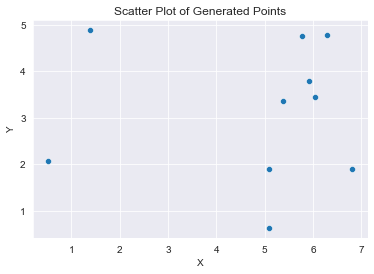

Generated Points: [(5.097252695659337, 0.628008985935245), (5.37659227601162, 3.350254054077469), (5.098922764367067, 1.8991985854516469), (5.771590577443348, 4.750209602596454), (6.0373965505940745, 3.4459198232940307)]
Pairwise Distances: [[0.0, 2.7365395689037735, 1.2711906965708013, 4.1769928779938095, 2.9706046447273393, 4.3224881718717345, 2.1368927612483577, 4.79503535713867, 5.637521583923801, 3.2717778619200146]]


In [2]:
length = 10.0
height = 5.0
#num_points = 136
num_points = 10

source_points, source_distances = generate_points(length, height, num_points)
print('Generated Points:', source_points[:5])
print('Pairwise Distances:', source_distances[:1])


In [3]:
import numpy as np
import itertools

def find_shortest_route(points):

    num_points = len(points)
    distances = [[0] * num_points for _ in range(num_points)]
    for i in range(num_points):
        for j in range(num_points):
            dist = sqrt((points[i][0] - points[j][0]) ** 2 + (points[i][1] - points[j][1]) ** 2)
            distances[i][j] = dist

    current_point = random.randint(0, num_points - 1)
    route = [current_point]

    while len(route) < num_points:
        nearest_neighbor = None
        nearest_distance = float('inf')
        for i in range(num_points):
            if i not in route and distances[current_point][i] < nearest_distance:
                nearest_neighbor = i
                nearest_distance = distances[current_point][i]

        
        route.append(nearest_neighbor)
        current_point = nearest_neighbor

    length = 0
    for i in range(num_points):
        length += distances[route[i]][route[(i + 1) % num_points]]

    return route, length


In [4]:
start_time = time.time()
shortest_route, shortest_length = find_shortest_route(source_points)
end_time = time.time()
bruteForceTime = end_time - start_time

In [5]:
from typing import List, Tuple
from math import sqrt
from random import randrange

def two_opt_algorithm(points: List[Tuple[float, float]], shortest_route: List[int], shortest_length: float, max_iterations: int=1000) -> Tuple[List[int], float]:

    point_dict = {point: i for i, point in enumerate(points)}
    indices = shortest_route.copy()

    def calculate_length(route: List[int]) -> float:
        length = 0
        for i in range(len(route) - 1):
            dist = sqrt((points[route[i]][0] - points[route[i+1]][0]) ** 2 + (points[route[i]][1] - points[route[i+1]][1]) ** 2)
            length += dist
        return length

    best_route = indices.copy()
    best_length = shortest_length
    for i in range(max_iterations):

        idx1, idx2 = sorted([randrange(len(points)) for _ in range(2)])
        new_route = indices[:idx1] + indices[idx1:idx2+1][::-1] + indices[idx2+1:]
        new_length = calculate_length(new_route)

        if new_length < best_length:
            best_route = new_route.copy()
            best_length = new_length

        indices = best_route.copy()

    optimized_route = [list(point_dict.keys())[list(point_dict.values()).index(idx)] for idx in best_route]
    optimized_route = [points.index(point) + 1 for point in optimized_route]

    return optimized_route, best_length


In [6]:
start_time = time.time()
twoopt_optimized_route, twoopt_optimized_length = two_opt_algorithm(source_points, shortest_route, shortest_length)
end_time = time.time()
twoOptTime = end_time - start_time


In [7]:
def three_opt_algorithm(points: List[Tuple[float, float]], shortest_route: List[int], shortest_length: float, max_iterations: int=1000) -> Tuple[List[int], float]:

    n = len(points)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            dist_matrix[i][j] = sqrt((points[i][0] - points[j][0]) ** 2 + (points[i][1] - points[j][1]) ** 2)
            dist_matrix[j][i] = dist_matrix[i][j]

    point_dict = {point: i for i, point in enumerate(points)}
    indices = shortest_route.copy()

    def calculate_length(route: List[int]) -> float:
        length = 0
        for i in range(len(route) - 1):
            length += dist_matrix[route[i]][route[i+1]]
        length += dist_matrix[route[-1]][route[0]]
        return length

    best_route = indices.copy()
    best_length = shortest_length
    for i in range(max_iterations):
        for idx1 in range(len(points)):
            for idx2 in range(idx1 + 2, len(points)):
                for idx3 in range(idx2 + 2, len(points)):
                    if idx1 == 0 and idx3 == len(points) - 1:
                        continue
                    segments = [
                        indices[:idx1+1],
                        indices[idx1+1:idx2+1],
                        indices[idx2+1:idx3+1],
                        indices[idx3+1:]
                    ]
                    new_route = []
                    for seg in segments:
                        new_route += seg[::-1] if randrange(2) == 0 else seg
                    new_length = calculate_length(new_route)
                    if new_length < best_length:
                        best_route = new_route.copy()
                        best_length = new_length
        indices = best_route.copy()

    optimized_route = [list(point_dict.keys())[list(point_dict.values()).index(idx)] for idx in best_route]
    optimized_route = [points.index(point) + 1 for point in optimized_route]

    return optimized_route, best_length


In [8]:
start_time = time.time()
threeopt_optimized_route, threeopt_optimized_length = three_opt_algorithm(source_points, shortest_route, shortest_length)
end_time = time.time()
threeOptTime = end_time - start_time

In [9]:
import random
import numpy as np

def create_chromosome(num_points):
    chromosome = list(range(num_points))
    random.shuffle(chromosome)
    return chromosome

def fitness(chromosome, distances):
    total_distance = 0
    for i in range(len(chromosome) - 1):
        j = chromosome[i]
        k = chromosome[i+1]
        total_distance += distances[j][k]
    return 1 / total_distance

def crossover(parent1, parent2):
    n = len(parent1)
    a = random.randint(0, n-1)
    b = random.randint(0, n-1)
    if a > b:
        a, b = b, a
    child = [-1] * n
    for i in range(a, b+1):
        child[i] = parent1[i]
    j = 0
    for i in range(n):
        if child[i] == -1:
            while parent2[j] in child:
                j += 1
            child[i] = parent2[j]
            j += 1
    return child

def mutate(chromosome, mutation_rate):
    if random.random() < mutation_rate:
        n = len(chromosome)
        a = random.randint(0, n-1)
        b = random.randint(0, n-1)
        chromosome[a], chromosome[b] = chromosome[b], chromosome[a]
    return chromosome

def select_parents(population, distances):
    fitness_values = [fitness(chromosome, distances) for chromosome in population]
    cum_sum = np.cumsum(fitness_values)
    selection_probabilities = cum_sum / cum_sum[-1]
    parent1_idx = np.searchsorted(selection_probabilities, random.random())
    parent2_idx = np.searchsorted(selection_probabilities, random.random())
    return population[parent1_idx], population[parent2_idx]

def generate_population(num_points, pop_size):
    population = [create_chromosome(num_points) for _ in range(pop_size)]
    return population

def genetic_algorithm(distances, pop_size=136, num_generations=100, mutation_rate=0.05):
    num_points = len(distances)
    population = generate_population(num_points, pop_size)
    best_chromosome = None
    best_fitness = 0
    for gen in range(num_generations):
        new_population = []
        for _ in range(pop_size):  
            parent1, parent2 = select_parents(population, distances)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)
        population = new_population
        fitness_values = [fitness(chromosome, distances) for chromosome in population]
        idx = np.argmax(fitness_values)
        if fitness_values[idx] > best_fitness:
            best_chromosome = population[idx]
            best_fitness = fitness_values[idx]
    distance = 0
    for i in range(len(best_chromosome) - 1):
        j = best_chromosome[i]
        k = best_chromosome[i+1]
        distance += distances[j][k]
    return best_chromosome, distance



In [10]:
ga_shortest_route, ga_distance = genetic_algorithm(source_distances, 150, 50, 0.05)

In [11]:
import numpy as np
import random

def aco(distances, num_ants, num_iterations, decay, alpha=1, beta=1):
    num_points = len(distances)
    pheromone = np.ones((num_points, num_points))
    best_path = None
    best_distance = float('inf')
    for it in range(num_iterations):
        paths = []
        distances_ = []
        for ant in range(num_ants):
            current = random.randint(0, num_points - 1)
            path = [current]
            distance_ = 0
            visited = set()
            visited.add(current)
            unvisited = set(range(num_points))
            unvisited.remove(current)
            while unvisited:
                weights = [((pheromone[current][j])**alpha)*((1/distances[current][j])**beta) for j in unvisited]
                selected = random.choices(list(unvisited), weights=weights, k=1)[0]
                path.append(selected)
                visited.add(selected)
                unvisited.remove(selected)
                distance_ += distances[current][selected]
                current = selected
            paths.append(path)
            distances_.append(distance_)
        pheromone *= (1 - decay)
        for i in range(num_ants):
            distance_ = distances_[i]
            path = paths[i]
            for j in range(num_points - 1):
                x = path[j]
                y = path[j+1]
                pheromone[x][y] += 1/distance_
        idx = np.argmin(distances_)
        if distances_[idx] < best_distance:
            best_path = paths[idx]
            best_distance = distances_[idx]
    return best_path, best_distance

# example usage
num_ants = 10
num_iterations = 100
decay = 0.1
alpha = 1
beta = 1
ac_shortest_path, ac_distance = aco(source_distances, num_ants, num_iterations, decay, alpha, beta)
#print("Best path found:", best_path)
#print("Distance of best path:", best_distance)


In [12]:
from typing import List, Tuple
import numpy as np
from math import sqrt


def calculate_length(route: List[int], distances: List[List[float]]) -> float:
    length = 0
    for i in range(len(route) - 1):
        length += distances[route[i]][route[i+1]]
    length += distances[route[-1]][route[0]]
    return length

def lin_kernighan_algorithm(distances: List[List[float]], max_iterations: int=1000) -> Tuple[List[int], float]:

    n = len(distances)
    gain_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            gain_matrix[i][j] = distances[i][j] - distances[i][j-1]
            gain_matrix[j][i] = gain_matrix[i][j]

    route = list(range(n))
    best_route = route.copy()
    best_length = calculate_length(route, distances)
    
    for _ in range(max_iterations):

        max_gain = 0
        for i in range(n):
            for j in range(i+2, n):
                if i == 0 and j == n-1:
                    continue
                gain = gain_matrix[route[i]][route[j]] + gain_matrix[route[i+1]][route[j-1]] - gain_matrix[route[i]][route[i+1]] - gain_matrix[route[j-1]][route[j]]
                if gain > max_gain:
                    max_gain = gain
                    max_i, max_j = i, j

        if max_gain == 0:
            break

        indices = list(range(max_i+1, max_j))
        indices.reverse()
        new_route = route[:max_i+1] + indices + route[max_j:]
        new_length = calculate_length(new_route, distances)

        if new_length < best_length:
            best_route = new_route.copy()
            best_length = new_length

        route = best_route.copy()

    return route, best_length

In [13]:
start_time = time.time()
linKernighan, linKernighan_length = lin_kernighan_algorithm(source_distances)
end_time = time.time()
linKernighanTime = end_time-start_time

In [14]:
import random
from typing import List, Tuple
import numpy as np
from math import exp, sqrt

def calculate_length(route: List[int], distances: List[List[float]]) -> float:
    length = 0
    for i in range(len(route) - 1):
        length += distances[route[i]][route[i+1]]
    length += distances[route[-1]][route[0]]
    return length


def simulated_annealing(distances: List[List[float]], initial_temperature: float = 1000.0,
                        cooling_rate: float = 0.995, max_iterations: int = 10000) -> Tuple[List[int], float]:

    n = len(distances)
    current_route = list(range(n))
    current_length = calculate_length(current_route, distances)
    best_route = current_route.copy()
    best_length = current_length

    temperature = initial_temperature
    for i in range(max_iterations):
        if temperature < 0.1:
            break
        new_route = current_route.copy()
        j, k = sorted(random.sample(range(n), 2))
        new_route[j:k+1] = reversed(new_route[j:k+1])
        new_length = calculate_length(new_route, distances)
        delta = new_length - current_length
        if delta < 0 or random.random() < exp(-delta / temperature):
            current_route = new_route
            current_length = new_length
        if current_length < best_length:
            best_route = current_route.copy()
            best_length = current_length
        temperature *= cooling_rate

    return best_route, best_length


In [15]:
start_time = time.time()
simAnnealing_route, simAnnealing_length = simulated_annealing(source_distances, initial_temperature=100000.0, cooling_rate=0.8, max_iterations=1000000)
end_time = time.time()
simAnnealingTime = end_time-start_time

In [16]:
from typing import List, Tuple
import random
import numpy as np
from math import exp, sqrt


def particle_swarm_algorithm(distances: List[List[float]], num_particles: int=50, max_iterations: int=1000,
                             w: float=0.8, c1: float=1.0, c2: float=1.0) -> Tuple[List[int], float]:

    n = len(distances)
    positions = np.zeros((num_particles, n), dtype=int)
    velocities = np.zeros((num_particles, n), dtype=int)
    pbest_positions = np.zeros((num_particles, n), dtype=int)
    pbest_fitness = np.ones(num_particles) * float('inf')
    gbest_position = np.zeros(n, dtype=int)
    gbest_fitness = float('inf')
    
    # Initialize particles with random positions and velocities
    for i in range(num_particles):
        positions[i] = np.random.permutation(n)
        velocities[i] = np.random.permutation(n) - n // 2

    for iteration in range(max_iterations):
        for i in range(num_particles):
            fitness = calculate_length(positions[i], distances)
            if fitness < pbest_fitness[i]:
                pbest_fitness[i] = fitness
                pbest_positions[i] = positions[i].copy()
            if fitness < gbest_fitness:
                gbest_fitness = fitness
                gbest_position = positions[i].copy()
                
        for i in range(num_particles):
            r1 = random.uniform(0, 1)
            r2 = random.uniform(0, 1)
            velocities[i] = w * velocities[i] + c1 * r1 * (pbest_positions[i] - positions[i]) + c2 * r2 * (gbest_position - positions[i])
            positions[i] = np.roll(positions[i] + velocities[i], random.randint(1, n-1))

    return gbest_position.tolist(), gbest_fitness


def calculate_length(route: List[int], distances: List[List[float]]) -> float:
    length = 0
    for i in range(len(route) - 1):
        length += distances[route[i]][route[i+1]]
    length += distances[route[-1]][route[0]]
    return length


In [20]:
start_time = time.time()
pso_route, pso_length = particle_swarm_algorithm(source_distances, num_particles=50, max_iterations=1000)
end_time = time.time()
psoTime = end_time-start_time

IndexError: list index out of range

In [24]:
#print(shortest_length, twoopt_optimized_length,threeopt_optimized_length, ga_distance, ac_distance, linKernighan_length,simAnnealing_length,pso_length, sep = ':')
import pandas as pd

outputDataframe = {

    "Algorithm"         : ["Brute force", "Two Opt Algorithm", "Three Opt Algorithm", "Genetic Algorithm", "Ant Colony Optimization", "Lin Kernighan", "Simulated Annealing"] ,
    "Distance"          : [shortest_length, twoopt_optimized_length, threeopt_optimized_length, ga_distance, ac_distance, linKernighan_length, simAnnealing_length]
    #"Calculation Time"  : []

}

df = pd.DataFrame(outputDataframe)
print(df)

                 Algorithm   Distance
0              Brute force  22.919597
1        Two Opt Algorithm  14.962528
2      Three Opt Algorithm  19.757563
3        Genetic Algorithm  16.362012
4  Ant Colony Optimization  14.962528
5            Lin Kernighan  29.943401
6      Simulated Annealing  24.503655


In [ ]:
#append to existing csv fil
'''
    create a csv elsewhere
    open it in append mode
    add each final output to csv
'''